# Visualizing PWMs

In [55]:
import numpy as np
import torch
import pandas as pd
from os.path import join as oj

from kipoi_veff.utils.plot import seqlogo_heatmap
import matplotlib.pyplot as plt

In [56]:
def swap_positions(pwms):
    # swap from agct to acgt format
    return pwms[:, np.array([0, 2, 1, 3]), :]

## Comparing direct, max activation, and all activation methods

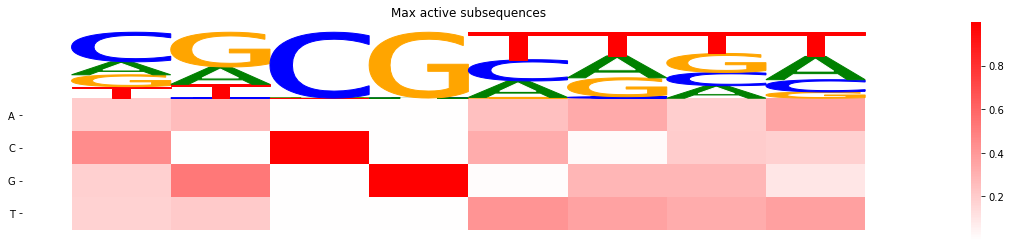

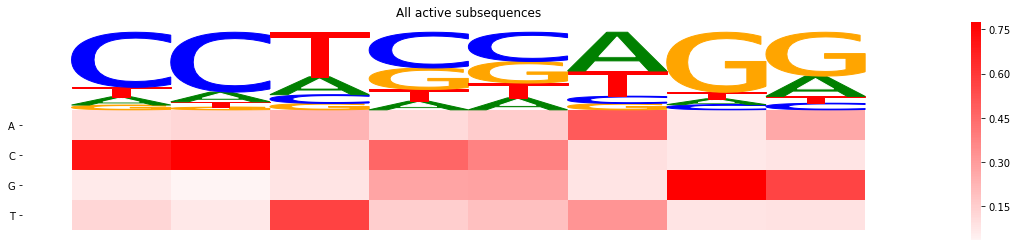

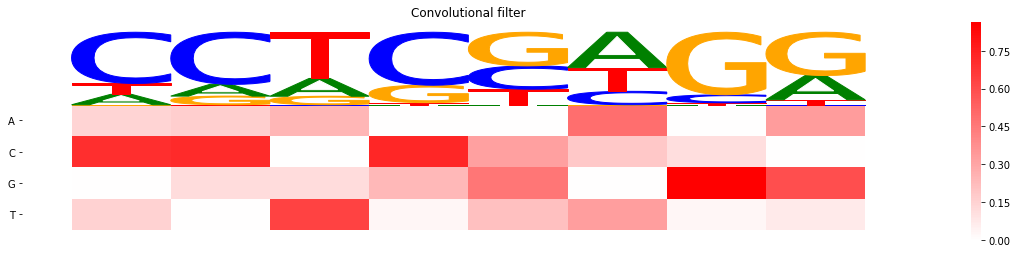

In [97]:
# out directory
out_dir = "out"

# load in pwms
pwms1 = swap_positions(np.load(oj(out_dir, "PWMs_max_active_per_seq.npy")))
pwms2 = swap_positions(np.load(oj(out_dir, "PWMs_all_active_per_seq.npy")))
pwms3 = np.load(oj(out_dir, "PWMs_direct.npy"))

# filters to look at
f1 = 106
f2 = 153
f3 = 153
pwm1 = pwms1[f1, :]
pwm2 = pwms2[f2, :]
pwm3 = pwms3[f3, :]
for i in range(pwm3.shape[1]):  # normalize direct pwm to be between 0 and 1 and colsum to 1
    pwm3[:, i] = (pwm3[:, i] - pwm3[:, i].min()) / (pwm3[:, i] - pwm3[:, i].min()).sum()
    
# visualize
seqlogo_heatmap(pwm1.T, pwm1)
plt.title("Max active subsequences")
plt.show()
seqlogo_heatmap(pwm2.T, pwm2)
plt.title("All active subsequences")
plt.show()
seqlogo_heatmap(pwm3.T, pwm3)
plt.title("Convolutional filter")
plt.show()

## Comparing PWMs from positive (Y = 1) and negative (Y = 0) cases

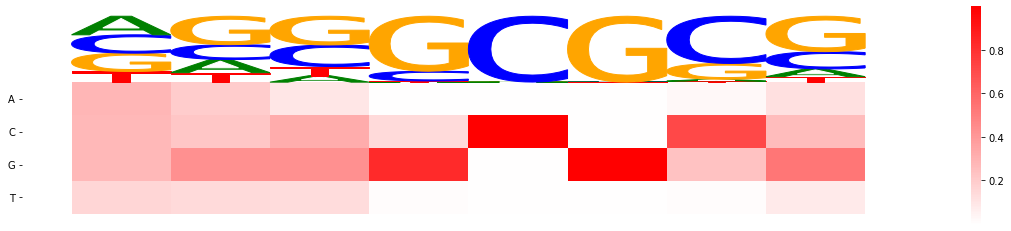

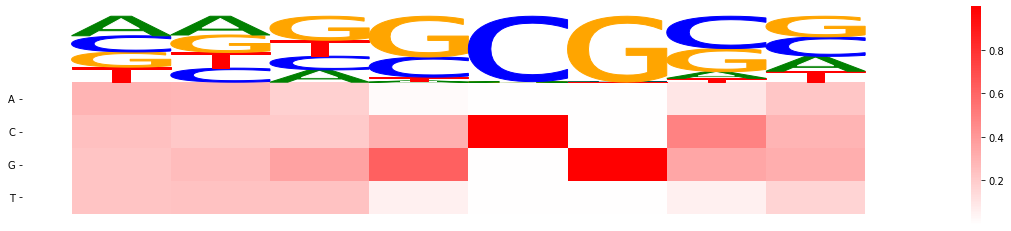

In [54]:
out_dir = "out"
pwms_path1 = "max_active_per_seq_yobserved_1"
pwms_path2 = "max_active_per_seq_yobserved_0"
f1 = 185
f2 = 185
resp = "WI-38|CTCF|None"
predictor_names = pd.read_csv(oj("data", "deepsea_train", "predictor.names"), header = None).values[:, 0]
pwms1 = swap_positions(torch.load(oj(out_dir, "PWMs_" + pwms_path1 + ".pt"))[predictor_names == resp, :][0, :].detach().numpy())
pwms2 = swap_positions(torch.load(oj(out_dir, "PWMs_" + pwms_path2 + ".pt"))[predictor_names == resp, :][0, :].detach().numpy())
pwm1 = pwms1[f1, :]
pwm2 = pwms2[f2, :]
seqlogo_heatmap(pwm1.T, pwm1)
plt.show()
seqlogo_heatmap(pwm2.T, pwm2)
plt.show()

## Comparing PWMs from predicted strong positive (Yhat > .9) cases 

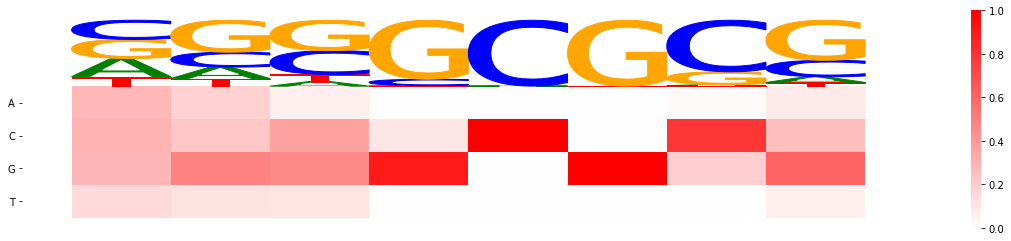

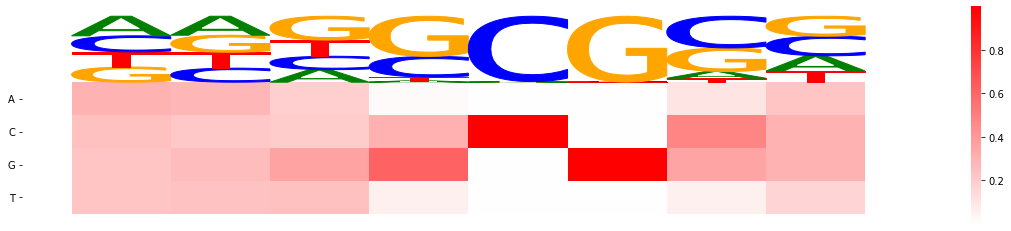

In [49]:
out_dir = "out"
pwms_path1 = "max_active_per_seq_ypredicted_0.9"
pwms_path2 = "max_active_per_seq_ypredicted_less0.9"
f1 = 185
f2 = 185
resp = "WI-38|CTCF|None"
predictor_names = pd.read_csv(oj("data", "deepsea_train", "predictor.names"), header = None).values[:, 0]
pwms1 = swap_positions(torch.load(oj(out_dir, "PWMs_" + pwms_path1 + ".pt"))[predictor_names == resp, :][0, :].detach().numpy())
pwms2 = swap_positions(torch.load(oj(out_dir, "PWMs_" + pwms_path2 + ".pt"))[predictor_names == resp, :][0, :].detach().numpy())
pwm1 = pwms1[f1, :]
pwm2 = pwms2[f2, :]
seqlogo_heatmap(pwm1.T, pwm1)
plt.show()
seqlogo_heatmap(pwm2.T, pwm2)
plt.show()

## Comparing PWMs from Filter 3 using bimodal split

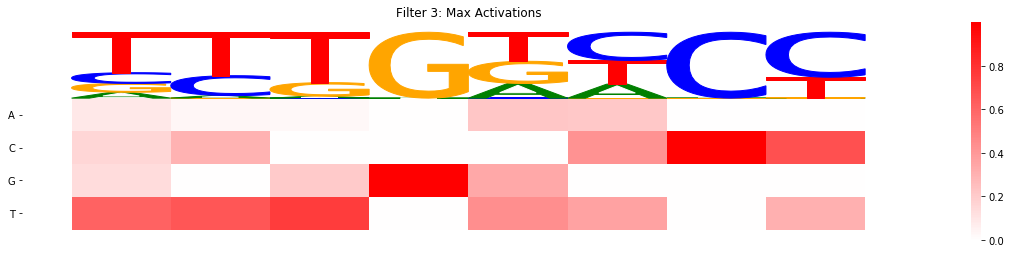

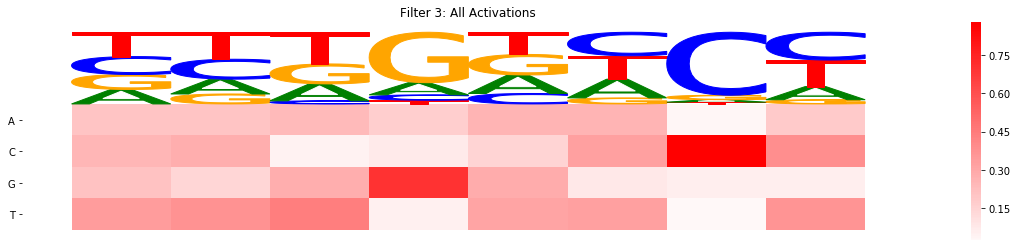

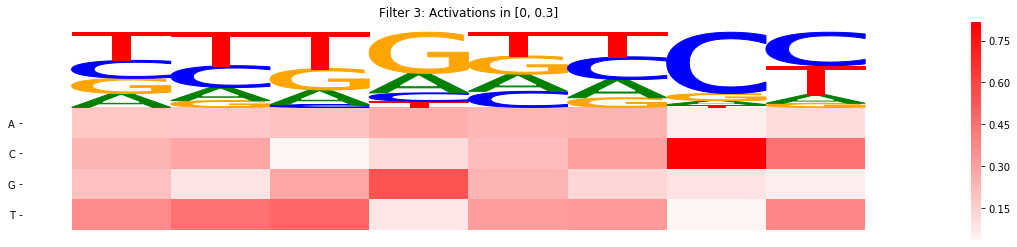

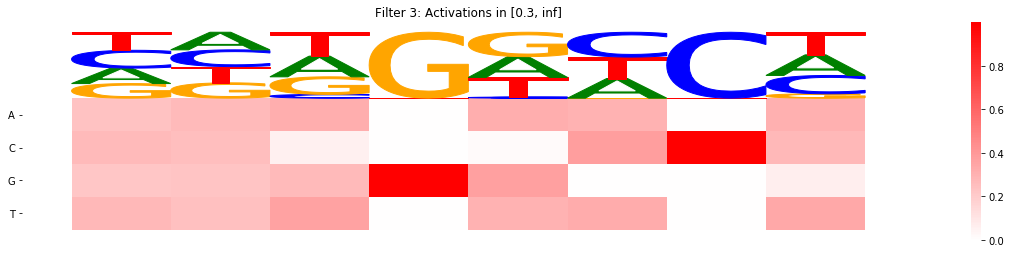

In [50]:
out_dir = "out"
pwms_path = "max_active_per_seq"
pwms_path1 = "all_active_per_seq_bimodal2"
pwms_path2 = "all_active_per_seq"
pwm_max = torch.load(oj(out_dir, "PWMs_" + pwms_path + ".pt")).numpy()[2, np.array([0, 2, 1, 3]), :]
pwm_all = torch.load(oj(out_dir, "PWMs_" + pwms_path2 + ".pt")).numpy()[2, np.array([0, 2, 1, 3]), :]
pwm0 = torch.load(oj(out_dir, "PWMs_" + pwms_path1 + "_0.pt")).numpy()[np.array([0, 2, 1, 3]), :]
pwm1 = torch.load(oj(out_dir, "PWMs_" + pwms_path1 + "_1.pt")).numpy()[np.array([0, 2, 1, 3]), :]
seqlogo_heatmap(pwm_max.T, pwm_max)
plt.title("Filter 3: Max Activations")
plt.show()
seqlogo_heatmap(pwm_all.T, pwm_all)
plt.title("Filter 3: All Activations")
plt.show()
seqlogo_heatmap(pwm0.T, pwm0)
plt.title("Filter 3: Activations in [0, 0.3]")
plt.show()
seqlogo_heatmap(pwm1.T, pwm1)
plt.title("Filter 3: Activations in [0.3, inf]")
plt.show()

In [54]:
pwms3 = np.stack([pwm_max, pwm_all, pwm0, pwm1])
np.save(oj(out_dir, 'PWMs_filter3.npy'), pwms3)
torch.save(torch.Tensor(pwms3), oj(out_dir, "PWMs_filter3.pt"))